In [1]:
%load_ext autoreload
%autoreload 2
%cd '~/deepshape/deepshape'

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time

In [3]:
from layers import FourierLayer2D
from surfaces import *
from visual import get_plot_data
from networks import ReparametrizationNetwork2D

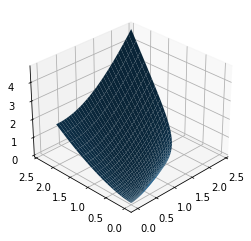

In [4]:
# TODO: Create example surfaces library, and load from there.
C = (
    lambda x: x[..., 0],
    lambda x: x[..., 1],
    lambda x: x[..., 0]**2 + x[..., 1]**2
)

f = Surface(C)
q = Qmap(f)
γ = Diffeomorphism((lambda x: x[..., 0], lambda x: 0.9*x[..., 1]**2 + 0.1 * x[..., 1]))

g = f.compose(γ)
r = Qmap(g)

Z = get_plot_data(r)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z)
ax.view_init(30, -135)
plt.show()

In [10]:
# Instantiate a 2-layer network with 5 basis functions per layer.
RN = ReparametrizationNetwork2D(3, 5)
optimizer = optim.SGD(RN.parameters(), lr=1e10, momentum=0.5)
# optimizer = optim.Adam(RN.parameters(), lr=1e-3)
RN.train(q, r, optimizer, iterations=100, nxpoints=32)

[Iter     1] loss: 0.07726
[Iter     2] loss: 0.31855
[Iter     3] loss: 0.69729
[Iter     4] loss: 0.23179
[Iter     5] loss: 0.15557
[Iter     6] loss: 0.32094
[Iter     7] loss: 0.53725
[Iter     8] loss: 0.25618
[Iter     9] loss: 0.22791
[Iter    10] loss: 0.42562
[Iter    11] loss: 0.38419
[Iter    12] loss: 0.25342
[Iter    13] loss: 0.30970
[Iter    14] loss: 0.33205
[Iter    15] loss: 0.32121
[Iter    16] loss: 0.33275
[Iter    17] loss: 0.32705
[Iter    18] loss: 0.31736
[Iter    19] loss: 0.32407
[Iter    20] loss: 0.32042
[Iter    21] loss: 0.32741
[Iter    22] loss: 0.32305
[Iter    23] loss: 0.32752
[Iter    24] loss: 0.32088
[Iter    25] loss: 0.32996
[Iter    26] loss: 0.32256
[Iter    27] loss: 0.33158
[Iter    28] loss: 0.32374
[Iter    29] loss: 0.33492
[Iter    30] loss: 0.32218
[Iter    31] loss: 0.33836
[Iter    32] loss: 0.31756
[Iter    33] loss: 0.33486
[Iter    34] loss: 0.32036
[Iter    35] loss: 0.32965
[Iter    36] loss: 0.31775
[Iter    37] loss: 0.33486
[

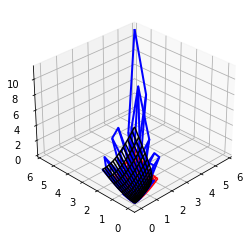

In [11]:
Zq = get_plot_data(q, k=16)
Zr = get_plot_data(r, k=16)
Zh = get_plot_data(lambda x: RN.reparametrized(r, x), k=16)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(*Zq, color='r')
ax.plot_wireframe(*Zh, color='b', lw=2.)
ax.plot_wireframe(*Zr, color='k')

ax.view_init(30, -135)